In [62]:
import pandas as pd
import spacy
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [63]:
# Load the data
df = pd.read_csv('../data/Emotion_final.csv')

In [64]:
df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [65]:
# Check the distribution of emotions
emotion_distribution = df['Emotion'].value_counts()
print(emotion_distribution)

happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64


In [66]:
# Load the English model
nlp = spacy.load('en_core_web_sm')

# Get the list of stopwords
stop_words = nlp.Defaults.stop_words

stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

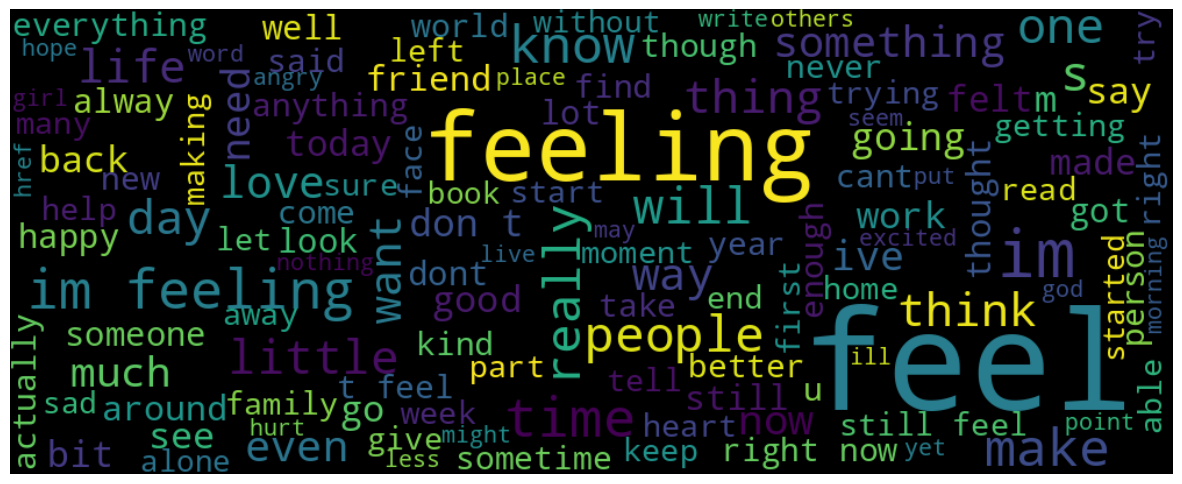

In [67]:
#finding most common words in the dataset

from wordcloud import WordCloud
import matplotlib.pyplot as plt


word= ' '.join([twts for twts in df['Text']])
clude= WordCloud(width=1000, height=400, random_state= 21,min_font_size=15,max_font_size=119).generate(word)
plt.figure(figsize = (15,15))
plt.imshow(clude,interpolation='bilinear')
plt.axis('off')
plt.show()

In [68]:
import string

# Function to remove punctuation from a text
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply the function to the 'Text' column
df['Text'] = df['Text'].apply(remove_punctuation)

# Add custom words to the list of stopwords
custom_stopwords = ['nt', 'm', 's', 't', 've' , 'feel', 'feeling' , 'feelings' , 'like' , 'know' , 'want' , 'time' , 'think' , 'little']
stop_words = stop_words.union(custom_stopwords)

# Function to remove stopwords from a text
def remove_stopwords(text):
    # Tokenize the text
    doc = nlp(text)
    
    # Remove stopwords and return the text
    return " ".join([token.text for token in doc if not token.is_stop])

# Apply the function to the 'Text' column
df['Text'] = df['Text'].apply(remove_stopwords)


In [69]:
# enregistre le fichier df dans le dossier data
df.to_csv('../data/Emotion_final_stopw.csv', index=False)

In [70]:
df_stopword = pd.read_csv('../data/Emotion_final_stopw.csv')

In [71]:
df_stopword

,Text,Emotion
0,nt feel humiliated,sadness
1,feeling hopeless damned hopeful cares awake,sadness
2,m grabbing minute post feel greedy wrong,anger
3,feeling nostalgic fireplace know property,love
4,feeling grouchy,anger
...,...,...
21454,Melissa stared friend dism,fear
21455,Successive state elections seen governing part...,fear
21456,Vincent irritated dismay,fear
21457,KendallHume turned face dismayed coup,fear


In [72]:
# Function to get most common words
def get_most_common_words(texts, num_words):
    words = [word for text in texts for word in text.split() if word not in stop_words]
    return Counter(words).most_common(num_words)

# Get the most common words for each emotion
for emotion in df_stopword['Emotion'].unique():
    texts = df_stopword[df_stopword['Emotion'] == emotion]['Text']
    print(f'{emotion}: {get_most_common_words(texts, 30)}')

sadness: [('life', 228), ('people', 226), ('bit', 220), ('things', 194), ('day', 177), ('going', 164), ('way', 162), ('don', 155), ('pretty', 146), ('right', 143), ('love', 137), ('felt', 136), ('sad', 130), ('bad', 126), ('today', 125), ('depressed', 123), ('need', 121), ('work', 121), ('good', 121), ('having', 110), ('days', 110), ('miserable', 108), ('kind', 101), ('lost', 101), ('feels', 99), ('home', 99), ('left', 99), ('look', 98), ('help', 97), ('sorry', 97)]
anger: [('people', 149), ('angry', 116), ('things', 105), ('bit', 103), ('way', 102), ('don', 93), ('offended', 92), ('resentful', 87), ('cold', 86), ('irritable', 84), ('going', 81), ('bothered', 81), ('greedy', 77), ('life', 74), ('mad', 74), ('insulted', 73), ('irritated', 72), ('need', 71), ('pissed', 71), ('violent', 70), ('annoyed', 70), ('hated', 70), ('dissatisfied', 68), ('fucked', 68), ('rude', 68), ('right', 67), ('bitchy', 67), ('cranky', 67), ('frustrated', 66), ('rushed', 66)]
love: [('love', 119), ('sweet', 8

### After cleaning the data and removing the stopwords, we identified the 30 most common words associated with each emotion in our dataset. Here are some observations:


<AxesSubplot: >

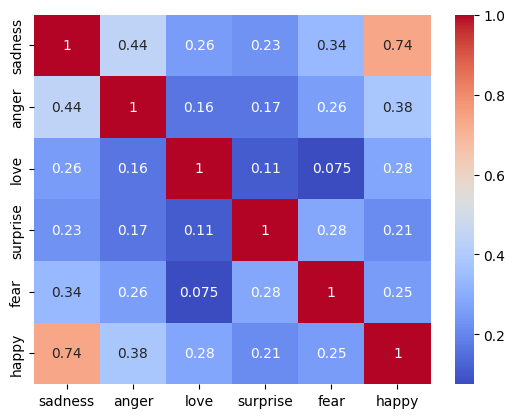

In [73]:
# Create a DataFrame with the frequencies of the most common words for each emotion
df_words = pd.DataFrame(index=df_stopword['Emotion'].unique(), columns=[word[0] for word in get_most_common_words(df_stopword['Text'], 30)])
for emotion in df_stopword['Emotion'].unique():
    texts = df_stopword[df_stopword['Emotion'] == emotion]['Text']
    common_words = get_most_common_words(texts, 30)
    for word, freq in common_words:
        df_words.loc[emotion, word] = freq

# Fill NaN values with 0
df_words.fillna(0, inplace=True)

# Calculate the cosine similarity between each pair of emotions
similarity_matrix = cosine_similarity(df_words.values)

# Create a DataFrame with the similarity matrix
df_similarity = pd.DataFrame(similarity_matrix, index=df_words.index, columns=df_words.index)

# Display the similarity matrix as a heatmap
sns.heatmap(df_similarity, annot=True, cmap='coolwarm')

In [74]:
df_similarity

,sadness,anger,love,surprise,fear,happy
sadness,1.000000,0.441994,0.255315,0.228134,0.335752,0.738692
anger,0.441994,1.000000,0.162218,0.165027,0.259412,0.383467
love,0.255315,0.162218,1.000000,0.110005,0.075033,0.279466
surprise,0.228134,0.165027,0.110005,1.000000,0.282850,0.212441
fear,0.335752,0.259412,0.075033,0.282850,1.000000,0.253037
happy,0.738692,0.383467,0.279466,0.212441,0.253037,1.000000


In [75]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_stopword['Text'], df_stopword['Emotion'], test_size=0.33, random_state=42)

# Create a Bag of Words vectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer and transform the training data
X_train = vectorizer.fit_transform(X_train)

# Transform the test data
X_test = vectorizer.transform(X_test)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000 , class_weight='balanced')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print a classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       anger       0.89      0.88      0.89       993
        fear       0.85      0.84      0.84       871
       happy       0.94      0.90      0.92      2279
        love       0.75      0.93      0.83       550
     sadness       0.94      0.90      0.92      2110
    surprise       0.66      0.88      0.76       279

    accuracy                           0.89      7082
   macro avg       0.84      0.89      0.86      7082
weighted avg       0.90      0.89      0.89      7082



In [76]:
# Create a DataFrame with the true and predicted values
df_results = pd.DataFrame({'True': y_test, 'Predicted': y_pred})

# Display the DataFrame
df_results

,True,Predicted
20248,happy,happy
8094,anger,anger
2859,sadness,happy
18953,sadness,sadness
3931,love,love
...,...,...
3418,anger,anger
5825,fear,happy
18875,happy,happy
1851,sadness,sadness


In [77]:
# Your text
text = "I'm so happy today!"

# Transform the text with the vectorizer
text_vectorized = vectorizer.transform([text])

# Make a prediction
prediction = model.predict(text_vectorized)

# Print the prediction
print(f"The predicted emotion for the text is: {prediction[0]}")

The predicted emotion for the text is: happy


In [78]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_stopword['Text'], df_stopword['Emotion'], test_size=0.33, random_state=42)

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer and transform the training data
X_train = vectorizer.fit_transform(X_train)

# Transform the test data
X_test = vectorizer.transform(X_test)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.93      0.79      0.85       993
        fear       0.88      0.77      0.82       871
       happy       0.82      0.96      0.89      2279
        love       0.88      0.63      0.74       550
     sadness       0.89      0.93      0.91      2110
    surprise       0.87      0.52      0.65       279

    accuracy                           0.86      7082
   macro avg       0.88      0.77      0.81      7082
weighted avg       0.87      0.86      0.86      7082

